In [0]:
!pip install nltk
 

In [0]:
# version check
 nltk.__version__

'3.2.5'

In [0]:
# Importing the Library
import nltk
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.


True

In [0]:
from nltk.corpus import twitter_samples
twitter_samples.fileids()

['negative_tweets.json', 'positive_tweets.json', 'tweets.20150430-223406.json']

In [0]:
text = twitter_samples.strings(
        'tweets.20150430-223406.json')
len(text)

20000

#Pre-Processing Text

**Word Tokenization**
In its natural form, it is difficult to programmatically analyze textual data. You must, therefore, convert text into smaller parts called tokens.

In [0]:
twitter_samples.tokenized('tweets.20150430-223406.json')[10]

['SNP', 'leader', 'faces', 'audience', 'questions', 'http://t.co/TYClKltSpW']

In [0]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
from nltk.tokenize import word_tokenize
word_tokenize(text[10])

['SNP',
 'leader',
 'faces',
 'audience',
 'questions',
 'http',
 ':',
 '//t.co/TYClKltSpW']

##Converting Words to their Canonical Form

In [0]:
from nltk.stem.porter import PorterStemmer 
stem = PorterStemmer()
stem.stem('swimming')

'swim'

In [0]:
stem.stem('swam')

'swam'

In [0]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [0]:
# use the lemmatizer.
from nltk.stem.wordnet import WordNetLemmatizer 
lem = WordNetLemmatizer()
lem.lemmatize('swim', 'v')


'swim'

In [0]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [0]:
from nltk.tag import pos_tag
sample = "Your time is limited, so don't waste it living someone else's life."
#sample = "i am GPA 5"
pos_tag(word_tokenize(sample))

[('Your', 'PRP$'),
 ('time', 'NN'),
 ('is', 'VBZ'),
 ('limited', 'VBN'),
 (',', ','),
 ('so', 'RB'),
 ('do', 'VBP'),
 ("n't", 'RB'),
 ('waste', 'VB'),
 ('it', 'PRP'),
 ('living', 'VBG'),
 ('someone', 'NN'),
 ('else', 'RB'),
 ("'s", 'POS'),
 ('life', 'NN'),
 ('.', '.')]

In [0]:
# For every word, the tagger returns a string. How do you make sense of the tags?
nltk.download('tagsets')


[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


True

In [0]:
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

In [0]:
def lemmatize_sentence(sentence):
    lemmatizer = WordNetLemmatizer()
    lemmatized_sentence = []
    for word, tag in pos_tag(word_tokenize(sentence)):
        if tag.startswith('NN'):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'
        lemmatized_sentence.append(lemmatizer.lemmatize(word, pos))
    return lemmatized_sentence

In [0]:
#  now ready to use the lemmatizer.
lemmatize_sentence(sample)

['Your',
 'time',
 'be',
 'limit',
 ',',
 'so',
 'do',
 "n't",
 'waste',
 'it',
 'live',
 'someone',
 'else',
 "'s",
 'life',
 '.']

# Remove Noise

**For the sample tweets,**

 you should remove the following — -

All hyperlinks, which would not add any value to the analysis

Twitter handles in replies

Punctuation and special characters

To search for each of the above items and remove them, you will use the regular expressions library in Python, through the package re.

In [0]:
import re
sample = 'Go to https://alibabacloud.com/campaign/techshare/ for tech tutorials'
re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
       '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', sample)

'Go to  for tech tutorials'

In [0]:
sample = 'Go to @alibaba for techshare tutorials'
re.sub('(@[A-Za-z0-9_]+)','', sample)

'Go to  for techshare tutorials'

In [0]:
# remove any punctuation marks using the string library.
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [0]:
sample = 'Hi!!! How are you?'
sample.translate(str.maketrans('', '', string.punctuation))

'Hi How are you'

In [0]:
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
print(len(stop_words))

stop_words[:3]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
179


['i', 'me', 'my']

In [0]:
def remove_noise(tokens, stop_words = ()):
    '''Remove @ mentions, hyperlinks, punctuation, and stop words'''
    clean_tokens = []
    lemmatizer = WordNetLemmatizer()
    for token, tag in pos_tag(tokens):
        # Remove Hyperlinks
        token = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                       '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', token)
        # Remove twitter handles
        token = re.sub("(@[A-Za-z0-9_]+)","", token)
        
        if tag.startswith("NN"):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'
        # Normalize sentence
        token = lemmatizer.lemmatize(token, pos)
        if len(token) > 0 and token not in string.punctuation and token.lower() not in stop_words:
            # Get lowercase
            clean_tokens.append(token)
    return clean_tokens

# Word Density

In [0]:
tokens_list = twitter_samples.tokenized('tweets.20150430-223406.json')
clean_tokens_list = [remove_noise(tokens, stop_words) for tokens in tokens_list]

In [0]:
all_words = []
for tokens in clean_tokens_list:
    for token in tokens:
        all_words.append(token)

In [0]:
freq_dist = nltk.FreqDist(all_words)
freq_dist.most_common(15)

[('RT', 13539),
 ('…', 7663),
 ('Miliband', 5222),
 ('SNP', 4491),
 ('Tories', 3923),
 ('Ed', 2686),
 ('Cameron', 2419),
 ('Labour', 2338),
 ('say', 2208),
 ('#bbcqt', 2106),
 ('...', 1725),
 ('vote', 1685),
 ('David', 1671),
 ('Farage', 1640),
 ('Tory', 1565)]

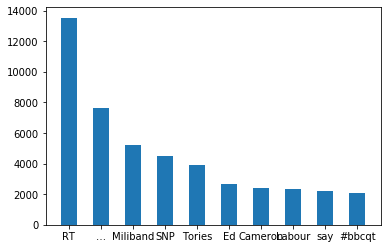

In [0]:
import matplotlib.pyplot as plt
items = freq_dist.most_common(10)
labels, values = zip(*items)
width = 0.5
plt.bar(labels, values, width, align='center', )
plt.show()

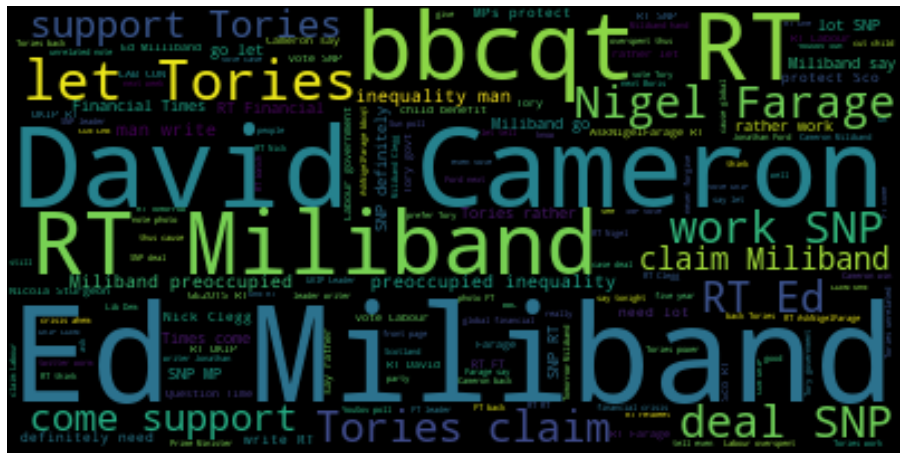

In [0]:
from wordcloud import WordCloud
cloud = WordCloud(max_font_size=60).generate(' '.join(all_words))
plt.figure(figsize=(16,12))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Named Entity Recognition

In [0]:
nltk.download('maxent_ne_chunker')

nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [0]:
#To find named entities in your text, you need to create chunks of the data as follows.
from nltk import ne_chunk, pos_tag
chunked = ne_chunk(pos_tag(clean_tokens_list[15]))

In [0]:
chunked.draw()

TclError: ignored

In [0]:
from collections import defaultdict
named_entities = defaultdict(list)
for node in chunked:
    # Check if node is a Tree
    # If not a tree, ignore
    if type(node) is nltk.tree.Tree:
        # Get the type of entity
        label = node.label()
        entity = node[0][0]
        named_entities[label].append(entity)

In [0]:
named_entities

defaultdict(list,
            {'GPE': ['Cameron'],
             'ORGANIZATION': ['LONDON'],
             'PERSON': ['David']})

# TF-IDF

In [0]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import numpy as np
cv = CountVectorizer(min_df=0.005, max_df=.5, ngram_range=(1,2))
sentences = [' '.join(tokens) for tokens in clean_tokens_list]
cv.fit(sentences)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=0.5, max_features=None, min_df=0.005,
                ngram_range=(1, 2), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [0]:
len(cv.vocabulary_)

460

In [0]:
cv_counts = cv.transform(sentences)

In [0]:
100.0 * cv_counts.nnz / (cv_counts.shape[0] * cv_counts.shape[1])

1.8398804347826088

In [0]:
transformed_weights = TfidfTransformer().fit_transform(cv_counts)
features = {}
for feature, weight in zip(cv.get_feature_names(),
                           np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()):
    features[feature] = weight
sorted_features = [(key, features[key]) 
                   for key in sorted(features, key=features.get, reverse=True)]

In [0]:
sorted_features[:10] 

[('snp', 0.05178276636641074),
 ('miliband', 0.05100430290549024),
 ('ukip', 0.04243121435695297),
 ('tories', 0.03728900816044612),
 ('ed', 0.03455733071449128),
 ('labour', 0.033745972243756014),
 ('bbcqt', 0.033517709341470525),
 ('cameron', 0.03308571509950097),
 ('farage', 0.033009781157403516),
 ('tory', 0.03129438215249338)]